In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [407]:
# https://www.ssb.no/statbank/table/03024/tableViewLayout1/
salmondf = pd.read_excel('salmon.xlsx')
# https://finance.yahoo.com/quote/EURNOK%3DX/history?period1=962409600&period2=1710201600&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true
currencydf = pd.read_csv('currency.csv')
#https://app.norges-bank.no/query/?fbclid=IwAR2WdTEeWVVvdNciJsTJGlnCgfIpxbqVEgmREKxj65FDLBbyWUEN0WxippQ#/no/interest?interesttype=KPRA&unitofmeasure=R&duration=SD&frequency=M&startdate=2000-01-01&stopdate=2023-12-31
ratedf  = pd.read_excel('IR.xlsx')
# https://www.fao.org/markets-and-trade/commodities/meat/fao-meat-price-index/en/
fooddf = pd.read_excel('food.xlsx')

In [408]:
#Renaming the column names
salmondf.columns =  ['Week', 'Tonnage', 'Price']
currencydf.columns = ['Day', 'Open', 'High', 'Low', 'Close', 'Currency', 'Volume']
ratedf.columns = ['Day', 'Rate']
fooddf.columns = ['Month', 'MeatPrice']

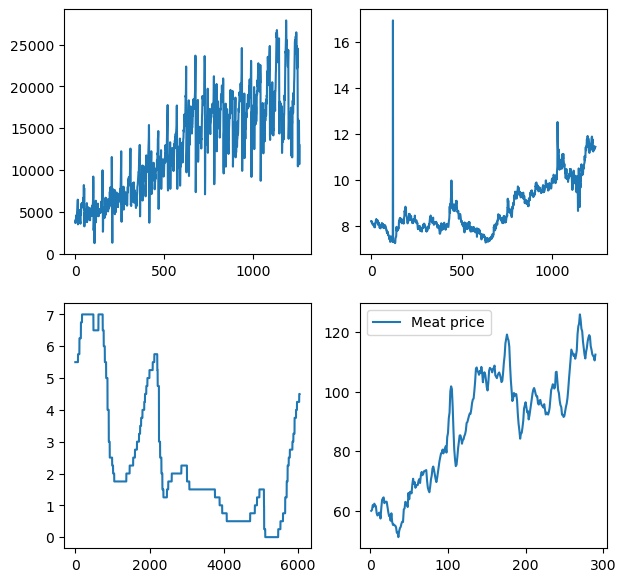

In [409]:
# Creating a simple plot to visualize the data
fig, ax = plt.subplots(2,2, figsize=(7,7))
ax[0,0].plot(salmondf['Tonnage'], label='Salmon price')
ax[0,1].plot(currencydf['Currency'], label='NOK EURO')
ax[1,0].plot(ratedf['Rate'], label='Styringsrente')
ax[1,1].plot(fooddf['MeatPrice'],label='Meat price')
plt.legend()
plt.show()

In [410]:
#Create new columns which allows for merging and concating

month_rate = []
rate_list = []
for i in range(0,len(ratedf),1):
    sel = int(ratedf['Day'][i][5:7])
    if (i != 0):
        if sel != month_rate[-1]:
            month_rate.append(sel)
            rate_list.append(ratedf['Rate'][i])
    else:
        month_rate.append(np.nan)

new_ratedf = pd.DataFrame({'Month':month_rate[1:],
                          'Rate': rate_list})



month_food = []
for i in range(0,len(fooddf),1):
    sel = fooddf['Month'][i].month
    month_food.append(sel)

fooddf['Month'] = month_food

In [411]:
# Choose specific parts of each dataframe and concatinate them

part1 = salmondf.iloc[52:1252,:].reset_index(drop=True)
part2 = currencydf.iloc[27:1227,:][['Currency','Day']].reset_index(drop=True)
conc1 = pd.concat([part1, part2],axis=1)
part3 = new_ratedf.reset_index(drop=True)
part4 = fooddf.iloc[1:289,1:].reset_index(drop=True)
conc2 = pd.concat([part3,part4],axis=1)

In [412]:
#Create a new column which allows for merging and concating

month_rate  = []
for i in range(0,len(conc1),1):
    sel = int(conc1['Day'][i][5:7])
    month_rate.append(sel)
conc1['Month'] = month_rate

In [413]:
# Turning monthly data into weekly  data.

secondary_iterator = 0
rate_list = []
food_list = []

for i in range(0,len(conc1),1):
    if (conc1['Month'][i] == conc2['Month'][secondary_iterator]):
        rate_list.append(conc2['Rate'][secondary_iterator])
        food_list.append(conc2['MeatPrice'][secondary_iterator])

    else:
        secondary_iterator += 1
        rate_list.append(conc2['Rate'][secondary_iterator])
        food_list.append(conc2['MeatPrice'][secondary_iterator])

In [414]:
# Put together the final dataframe and  saving it.

final_df = pd.DataFrame({'Date': conc1['Day'],
                       'Salmon_exp_vol': conc1['Tonnage'],
                       'Salmon_exp_price': conc1['Price'],
                       'FX_EURONOK': conc1['Currency'],
                       'Interest_rate': rate_list,
                       'Food_index': food_list})
final_df.to_csv('Preprocessed_data.csv', index=False)

In [ ]:
print('hello world')